In [23]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
landing = pd.read_csv("/Users/lijinpeng/Desktop/MDoyster/data/Oyster/FOSS_landings.csv")

In [16]:
# Check data types of all columns
print(landing.dtypes)

Year                 int64
State               object
NMFS Name           object
Pounds             float64
Metric Tons         object
Dollars             object
Confidentiality     object
Collection          object
Scientific Name     object
Tsn                  int64
Source              object
dtype: object


In [21]:
print(landing.head())

   year     state        nmfs_name     pounds  metric_tons     dollars  \
0  2023  MARYLAND  OYSTER, EASTERN  1923416.0        872.0  23652717.0   
1  2023  VIRGINIA  OYSTER, EASTERN  4366079.0       1980.0  47765014.0   
2  2022  MARYLAND  OYSTER, EASTERN  1768392.0        802.0  24741846.0   
3  2022  VIRGINIA  OYSTER, EASTERN  4428519.0       2009.0  32204135.0   
4  2021  MARYLAND  OYSTER, EASTERN  1391248.0        631.0  15403761.0   

  confidentiality  collection        scientific_name    tsn source  
0          Public  Commercial  Crassostrea virginica  79872  ACCSP  
1          Public  Commercial  Crassostrea virginica  79872  ACCSP  
2          Public  Commercial  Crassostrea virginica  79872  ACCSP  
3          Public  Commercial  Crassostrea virginica  79872  ACCSP  
4          Public  Commercial  Crassostrea virginica  79872  ACCSP  


## 1. Clean the dataset

In [12]:
# strp whitespace from name
landing.columns = landing.columns.str.strip()

In [17]:
# remove commas and convert to numeric
landing['Metric Tons'] = landing['Metric Tons'].str.replace(',', '').astype(float)  
landing['Dollars'] = landing['Dollars'].str.replace(',', '').astype(float)


In [20]:
# Convert all column names to lowercase
landing.columns = (
  landing.columns
  .str.lower()
  .str.strip()  # Remove leading/trailing whitespace
  .str.replace(' ', '_')  # Replace spaces with underscores
  .str.replace('[^a-z0-9_]', '')  # Remove non-alphanumeric characters (except underscore)
  )

## 2.Explore the "nmfs_name"

In [22]:
# View unique values in the NMFS Name column
unique_nmfs_names = landing['nmfs_name'].unique()
print(f"Unique NMFS Names: {unique_nmfs_names}")

# Count the number of unique values
nmfs_name_count = landing['nmfs_name'].nunique()
print(f"Number of unique NMFS Names: {nmfs_name_count}")


Unique NMFS Names: ['OYSTER, EASTERN']
Number of unique NMFS Names: 1


## 3. Analysis

In [25]:
# Group by year and state
grouped_tons = landing.groupby(['year','state'])[['metric_tons']].sum().reset_index()
grouped_dollars = landing.groupby(['year','state'])[['dollars']].sum().reset_index()

print(grouped_dollars)
print(grouped_tons)

     year        state     dollars
0    1950     MARYLAND   5520892.0
1    1950  MISSISSIPPI    195370.0
2    1950     VIRGINIA   5573880.0
3    1951     MARYLAND   6692360.0
4    1951  MISSISSIPPI     10515.0
..    ...          ...         ...
210  2021     VIRGINIA  30250151.0
211  2022     MARYLAND  24741846.0
212  2022     VIRGINIA  32204135.0
213  2023     MARYLAND  23652717.0
214  2023     VIRGINIA  47765014.0

[215 rows x 3 columns]
     year        state  metric_tons
0    1950     MARYLAND       6535.0
1    1950  MISSISSIPPI        230.0
2    1950     VIRGINIA       7052.0
3    1951     MARYLAND       6587.0
4    1951  MISSISSIPPI         13.0
..    ...          ...          ...
210  2021     VIRGINIA       1648.0
211  2022     MARYLAND        802.0
212  2022     VIRGINIA       2009.0
213  2023     MARYLAND        872.0
214  2023     VIRGINIA       1980.0

[215 rows x 3 columns]


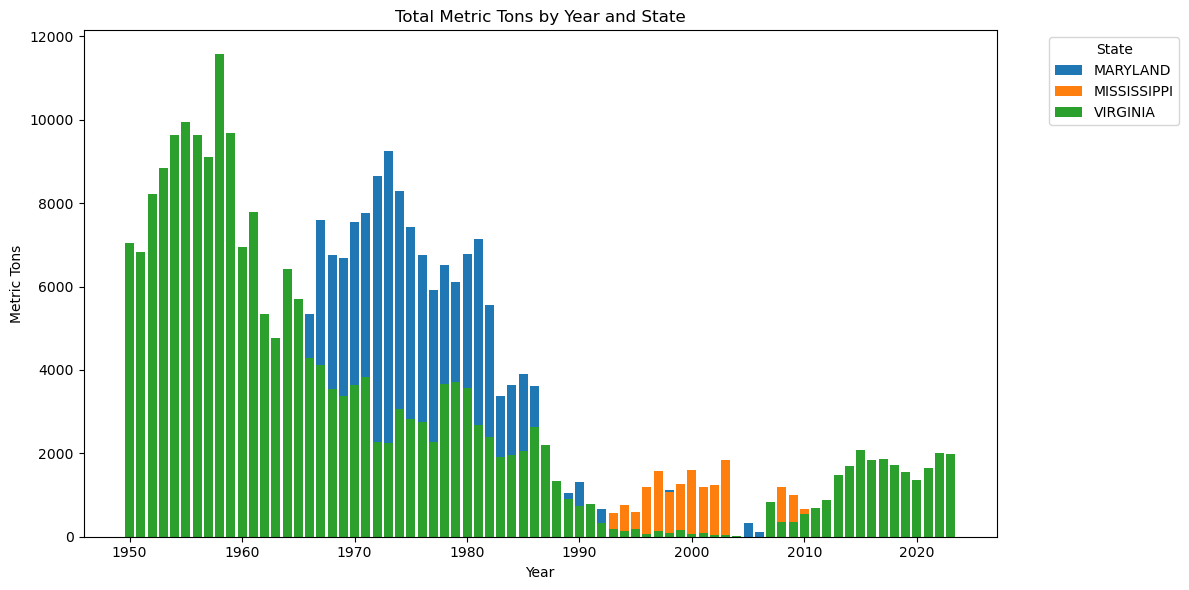

In [27]:
plt.figure(figsize=(12, 6))
for state in grouped_tons['state'].unique():
    state_data = grouped_tons[grouped_tons['state'] == state]
    plt.bar(state_data['year'], state_data['metric_tons'], label=state)

plt.title('Total Metric Tons by Year and State')
plt.xlabel('Year')
plt.ylabel('Metric Tons')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

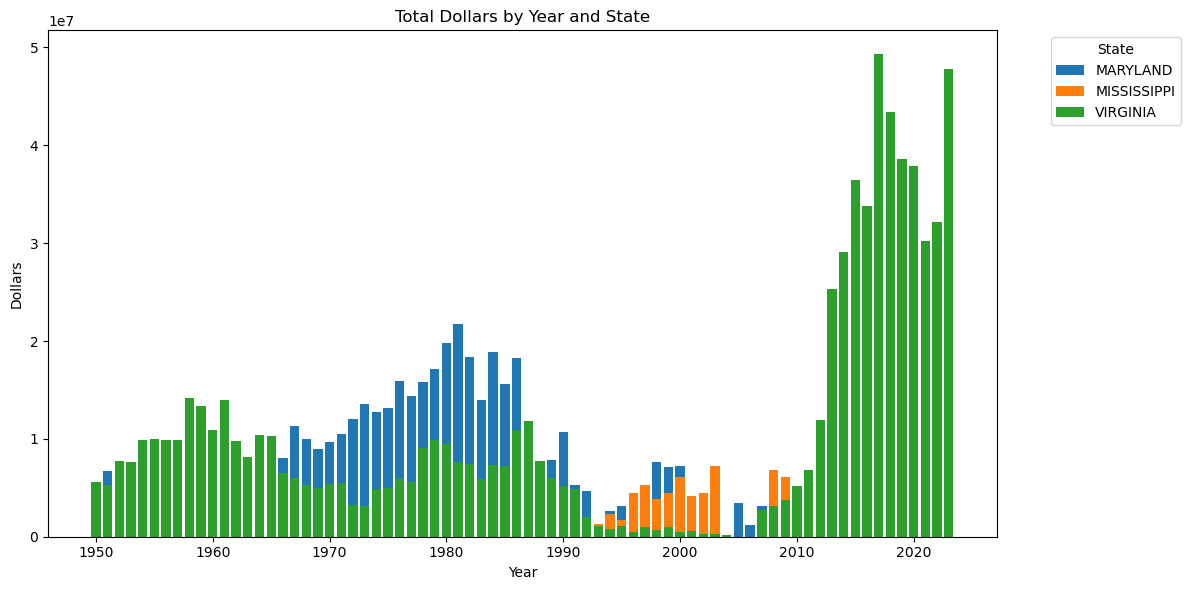

In [28]:
plt.figure(figsize=(12, 6))
for state in grouped_dollars['state'].unique():
    state_data = grouped_dollars[grouped_dollars['state'] == state]
    plt.bar(state_data['year'], state_data['dollars'], label=state)

plt.title('Total Dollars by Year and State')
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()